In [1]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import sklearn.naive_bayes as nb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#read the data
bank_data=pd.read_csv("bankchurn.csv")

bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(f'{bank_data.shape[0]} samples and {bank_data.shape[1]} features in the insurance  dataset.')

10000 samples and 13 features in the insurance  dataset.


In [4]:
#view data types
bank_data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
#view statistical information.
bank_data.describe([0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
99%,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#information about data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
bank_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# checking null-values in dataset
bank_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#checking for duplicate values
bank_data[bank_data.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
# checking Unique
bank_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
#dropping the un-neccesary columns
bank_data = bank_data.drop(['CustomerId','Surname'], axis = 1)

In [12]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
bank_data.Geography= np.where((bank_data["Geography"]=="fra")|(bank_data["Geography"]=="france"),"France",bank_data.Geography)
bank_data.Geography= np.where((bank_data["Geography"]=="espanio")|(bank_data["Geography"]=="spain"),"Spain",bank_data.Geography)
bank_data.Geography= np.where((bank_data["Geography"]=="GERMANY")|(bank_data["Geography"]=="gernamy")|((bank_data["Geography"]=="germany")|((bank_data["Geography"]=="ger"))),"Germany",bank_data.Geography)

In [17]:
#bank_data.to_csv("churnbank.csv")

## Exploratory Data Analysis (EDA)

### 1)spearating categorical and numerical columns

In [15]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

In [16]:
categorical,continuous=separate_data_types(bank_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical     continuous
--------------  ---------------
Geography       CreditScore
Gender          Age
NumOfProducts   Tenure
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


### Appending CAT to CAT misplaced in NUM

In [17]:
#continuous.remove("Geography")
#categorical.append("Geography")

In [18]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical     continuous
--------------  ---------------
Geography       CreditScore
Gender          Age
NumOfProducts   Tenure
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


## Identify Outliers

In [19]:
print('row and columns before removing outliers:',bank_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]

row and columns before removing outliers: (10000, 11)
wait till shape after removing outlier is printed...


In [20]:
for i in continuous:
    print('i is',i)
    myOutliers(bank_data,i)
    print('***************************************************')

i is CreditScore
the lower range of CreditScore is 383.0
the upper range of CreditScore is 919.0
total outliers in CreditScore are 15
***************************************************
i is Age
the lower range of Age is 14.0
the upper range of Age is 62.0
total outliers in Age are 359
***************************************************
i is Tenure
the lower range of Tenure is -3.0
the upper range of Tenure is 13.0
total outliers in Tenure are 0
***************************************************
i is Balance
the lower range of Balance is -191466.36000000002
the upper range of Balance is 319110.60000000003
total outliers in Balance are 0
***************************************************
i is EstimatedSalary
the lower range of EstimatedSalary is -96577.09624999999
the upper range of EstimatedSalary is 296967.45375
total outliers in EstimatedSalary are 0
***************************************************


### Removing Outliers

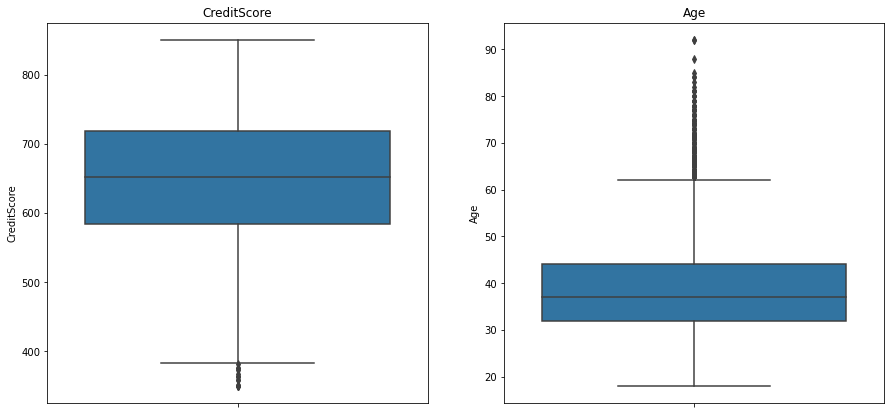

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=bank_data['CreditScore'],ax=ax[0]).set(title='CreditScore')
sns.boxplot(y=bank_data['Age'],ax=ax[1]).set(title='Age')
plt.show()

In [23]:
#bank_data=bank_data[(bank_data['CreditScore']>=300) & (bank_data["CreditScore"]<=850)]

No need to remove outliers from this two features because if we delete, then we may loose important information about customers to it is advisable not to delete this records.

## Univariate Analysis

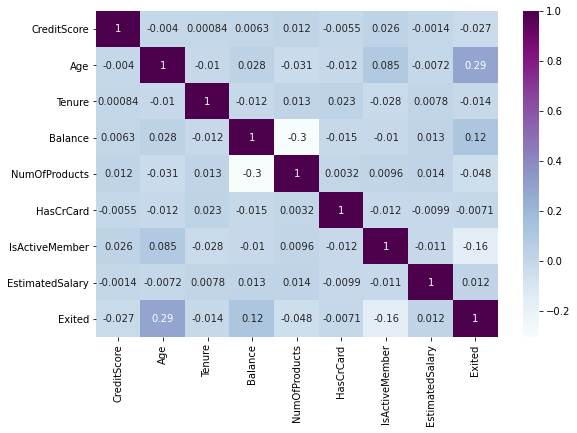

In [21]:
fig,ax=plt.subplots(figsize=(9,6))
sns.heatmap(bank_data.corr(),annot=True,cmap="BuPu")
plt.show()

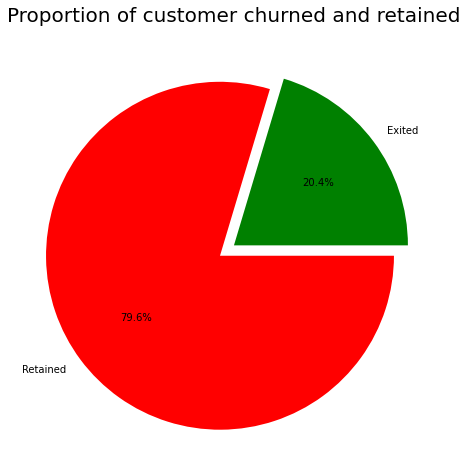

In [22]:
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
c = ['green','red']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=c)
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

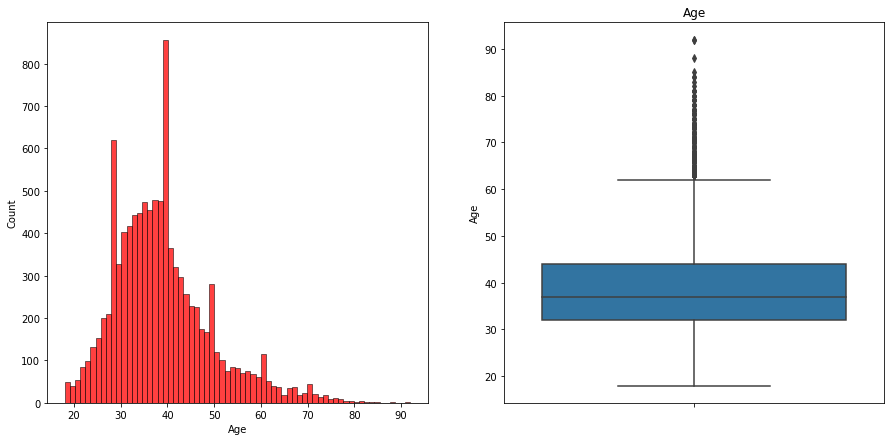

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['Age'],ax=ax[0],color='r')
sns.boxplot(y=bank_data['Age'],ax=ax[1]).set(title='Age')
plt.show()

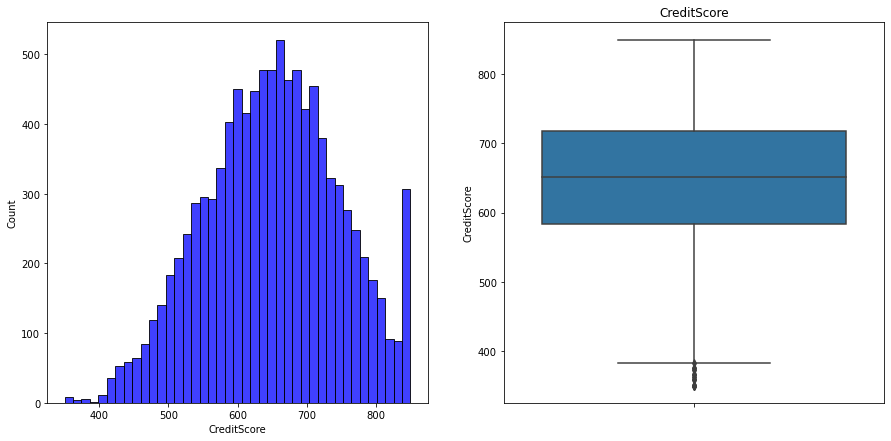

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['CreditScore'],ax=ax[0],color='b')
sns.boxplot(y=bank_data['CreditScore'],ax=ax[1]).set(title='CreditScore')
plt.show()

## Bivariate

In [25]:
bank_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

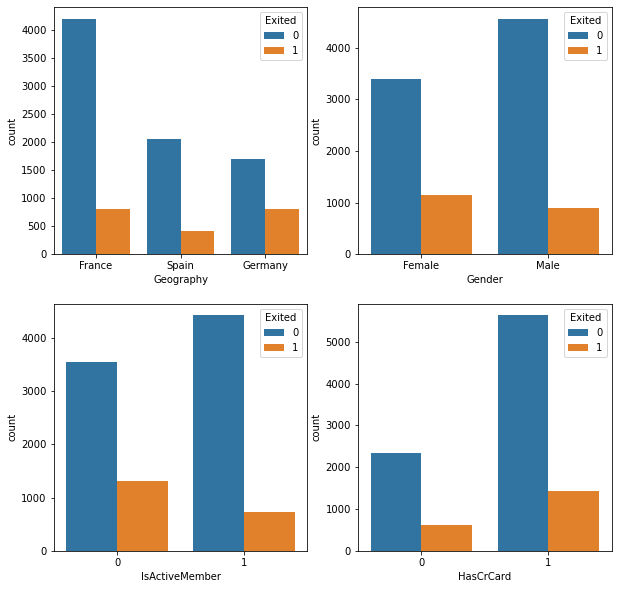

In [26]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Geography',hue='Exited',data=bank_data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='Gender',hue='Exited',data=bank_data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='IsActiveMember',hue='Exited',data=bank_data,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='HasCrCard',hue='Exited',data=bank_data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()  

#### female customers churning is also greater than that of male customers

#### majority of the customers that churned are those with credit cards

#### large crowd who is churning is not active member

#### droping incorrectly filled rows 

<AxesSubplot:xlabel='Geography', ylabel='count'>

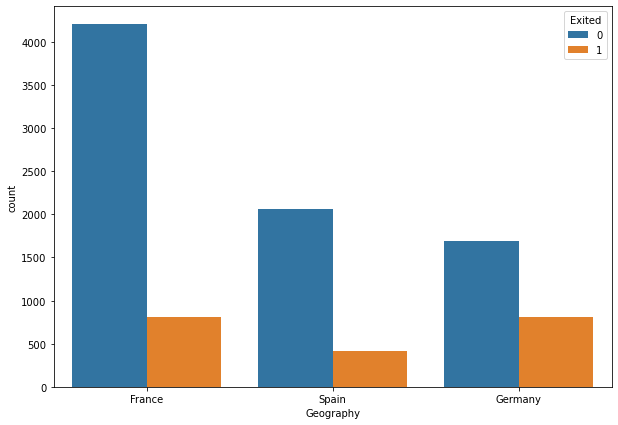

In [27]:
fig, axarr = plt.subplots(figsize=(10, 7))
sns.countplot(x='Geography', hue = 'Exited',data = bank_data)

#### interpretation:majority of populations are leaving from France and spain

## Multivariate

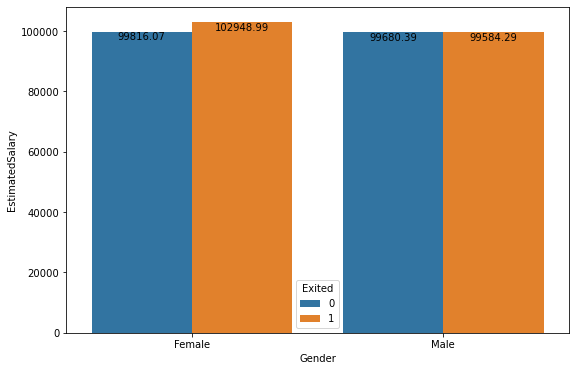

In [28]:
fig,ax= plt.subplots(figsize=(9,6))
sns.barplot(x=bank_data['Gender'],y=bank_data['EstimatedSalary'],hue=bank_data['Exited'],ci=None,ax=ax)
count=len(bank_data['Gender'])

for bar in ax.patches:
    #percentage = f'{round((bar.get_height()/count),2)}%'
    count = f"{round((bar.get_height()), 2)}" 
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),ha='center',va='top')
    
plt.show()

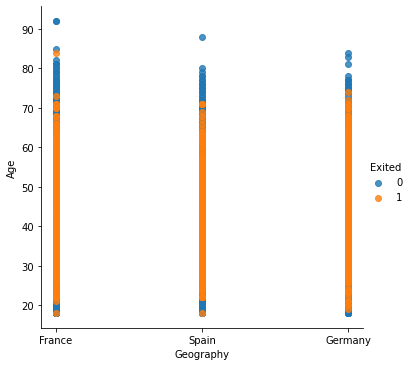

In [21]:
sns.lmplot(x='Geography',y='Age', data=bank_data, hue="Exited", fit_reg=False);

## Creating Dummies

In [29]:
bank_data = pd.get_dummies(bank_data, columns =["Geography", "Gender"], drop_first = False)

In [30]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Data Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = [ 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts','EstimatedSalary']
       
bank_data[scale_columns] = std_scaler.fit_transform(bank_data[scale_columns])

bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


## Spliting the data into train and test

In [33]:
#Creating test and training datasets
bank_train, bank_test = train_test_split(bank_data,train_size = 0.7)

print('Size of training dataset: ', bank_train.shape)
print('Size of test dataset: ', bank_test.shape)

Size of training dataset:  (7000, 14)
Size of test dataset:  (3000, 14)


In [34]:
X_train = bank_train.drop(columns='Exited', axis =1)
Y_train = bank_train['Exited']
X_test = bank_test.drop(columns='Exited', axis =1)
Y_test = bank_test['Exited']
X_train.shape, Y_train.shape, X_test.shape

((7000, 13), (7000,), (3000, 13))

In [35]:
## User defined function for accuracy report

def confusionMatrix(df):
    #accuracy score
    print("Accuracy Score = {}".format(accuracy_score(df.actual,df.predicted)))
    print("\n")
    #Confusion Matrix
    print("Confusion Matrix")
    print(pd.crosstab(df.actual,df.predicted,margins=True))
    print("\n")
    #Classification Report
    print("Calssification Report\n",classification_report(df.actual, df.predicted))
    
    # ROC /AUC
    fpr,tpr,_=metrics.roc_curve(df.actual,df.predicted)
    area_under_curve=metrics.auc(fpr,tpr)
    
    #plot the ROC
    
    plt.title("Receptive Characterstic Curve")
    plt.plot(fpr,tpr,'b',label="AUC="+str(area_under_curve))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') #dummy model
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()

## Logistic Regression

In [36]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
pred_log = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [37]:
df2=pd.DataFrame({'actual':Y_test,'predicted':pred_log.flatten(),'True/false':Y_test==pred_log})
df2

,actual,predicted,True/false
5802,0,0,True
9884,1,0,False
407,0,0,True
8305,1,0,False
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8256666666666667


Confusion Matrix
predicted     0    1   All
actual                    
0          2344   99  2443
1           424  133   557
All        2768  232  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2443
           1       0.57      0.24      0.34       557

    accuracy                           0.83      3000
   macro avg       0.71      0.60      0.62      3000
weighted avg       0.80      0.83      0.80      3000



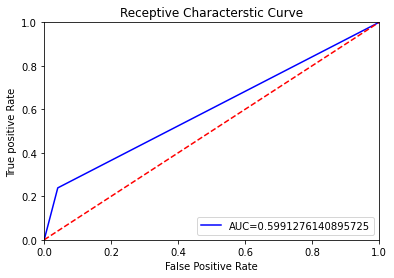

None


In [38]:
print(confusionMatrix(df2))

In [39]:
acc_log=accuracy_score(Y_test, pred_log)
acc_log

0.8256666666666667

## KNeighborsClassifier

In [40]:
model = KNeighborsClassifier(n_neighbors=3)#k value

model.fit(X_train, Y_train)

pred_KNN= model.predict(X_test)

acc_KNN = round(model.score(X_train, Y_train) * 100, 2)


In [41]:
acc_KNN =accuracy_score(Y_test, pred_KNN)

In [42]:
df3=pd.DataFrame({'actual':Y_test,'predicted':pred_KNN.flatten(),'True/false':Y_test==pred_KNN})
df3

,actual,predicted,True/false
5802,0,0,True
9884,1,1,True
407,0,0,True
8305,1,1,True
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8433333333333334


Confusion Matrix
predicted     0    1   All
actual                    
0          2268  175  2443
1           295  262   557
All        2563  437  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2443
           1       0.60      0.47      0.53       557

    accuracy                           0.84      3000
   macro avg       0.74      0.70      0.72      3000
weighted avg       0.83      0.84      0.84      3000



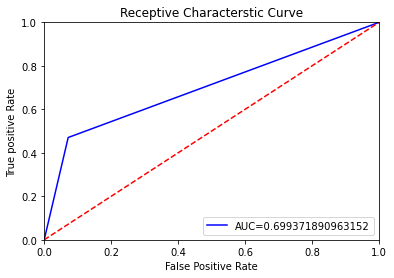

None


In [43]:
print(confusionMatrix(df3))

## DecisionTreeClassifier

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
pred_DTC = clf.predict(X_test)

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, pred_DTC))

Accuracy: 0.858


In [46]:
acc_DTC=metrics.accuracy_score(Y_test, pred_DTC)

In [47]:
df4=pd.DataFrame({'actual':Y_test,'predicted':pred_DTC.flatten(),'True/false':Y_test==pred_DTC})
df4

,actual,predicted,True/false
5802,0,0,True
9884,1,0,False
407,0,0,True
8305,1,1,True
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.858


Confusion Matrix
predicted     0    1   All
actual                    
0          2405   38  2443
1           388  169   557
All        2793  207  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2443
           1       0.82      0.30      0.44       557

    accuracy                           0.86      3000
   macro avg       0.84      0.64      0.68      3000
weighted avg       0.85      0.86      0.83      3000



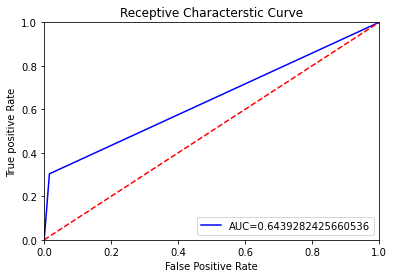

None


In [48]:
print(confusionMatrix(df4))

## RandomForestClassifier

In [49]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_RFC=model.predict(X_test)
y_RFC

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
acc_RFC=accuracy_score(Y_test, y_RFC)

In [51]:
df=pd.DataFrame({'actual':Y_test,'predicted':y_RFC.flatten(),'True/false':Y_test==y_RFC})
df

,actual,predicted,True/false
5802,0,0,True
9884,1,1,True
407,0,0,True
8305,1,1,True
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8696666666666667


Confusion Matrix
predicted     0    1   All
actual                    
0          2353   90  2443
1           301  256   557
All        2654  346  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2443
           1       0.74      0.46      0.57       557

    accuracy                           0.87      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



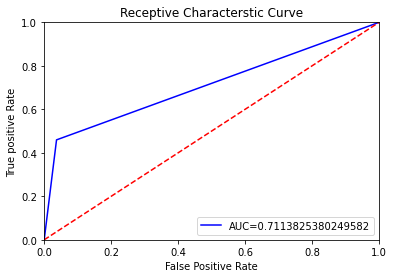

None


In [52]:
print(confusionMatrix(df))

In [53]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, y_RFC)
# calculate AUC
auc = roc_auc_score(Y_test, y_RFC)
print('AUC: %.3f' % auc)

AUC: 0.711


In [54]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [55]:
# predict probabilities
lr_probs = model.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.854


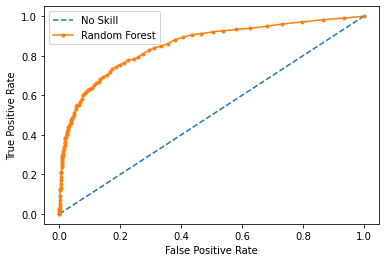

In [56]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1 ]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM

In [57]:
svc = SVC()
svc.fit(X_train, Y_train)
y_svc = svc.predict(X_test)

In [58]:
df1=pd.DataFrame({'actual':Y_test,'predicted':y_svc.flatten(),'True/false':Y_test==y_svc})
df1

,actual,predicted,True/false
5802,0,0,True
9884,1,0,False
407,0,0,True
8305,1,1,True
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8703333333333333


Confusion Matrix
predicted     0    1   All
actual                    
0          2381   62  2443
1           327  230   557
All        2708  292  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2443
           1       0.79      0.41      0.54       557

    accuracy                           0.87      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.86      0.87      0.85      3000



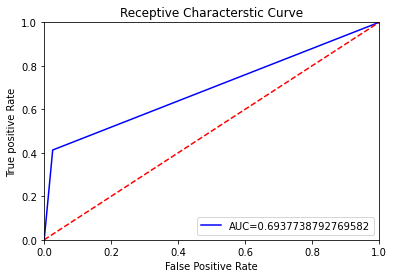

None


In [59]:
print(confusionMatrix(df1))

In [60]:
acc_svc=accuracy_score(Y_test, y_svc)

## Naive Bayes

In [61]:
gnb = nb.GaussianNB()
GNB=gnb.fit(X_train, Y_train)
y_nb = GNB.predict(X_test)

In [62]:
acc_nb=accuracy_score(Y_test, y_nb)

In [63]:
df5=pd.DataFrame({'actual':Y_test,'predicted':y_nb.flatten(),'True/false':Y_test==y_nb})
df5

,actual,predicted,True/false
5802,0,0,True
9884,1,0,False
407,0,0,True
8305,1,0,False
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8256666666666667


Confusion Matrix
predicted     0    1   All
actual                    
0          2259  184  2443
1           339  218   557
All        2598  402  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      2443
           1       0.54      0.39      0.45       557

    accuracy                           0.83      3000
   macro avg       0.71      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000



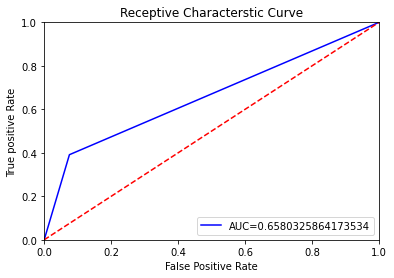

None


In [64]:
print(confusionMatrix(df5))

## final model will be Random Forest 

## Actual vs Predicted

In [67]:
df=pd.DataFrame({'actual':Y_test,'predicted':y_RFC.flatten(),'True/false':Y_test==y_RFC})

In [68]:
df

,actual,predicted,True/false
5802,0,0,True
9884,1,1,True
407,0,0,True
8305,1,1,True
2297,0,0,True
...,...,...,...
1613,0,0,True
3504,0,0,True
946,1,0,False
7576,0,0,True


Accuracy Score = 0.8696666666666667


Confusion Matrix
predicted     0    1   All
actual                    
0          2353   90  2443
1           301  256   557
All        2654  346  3000


Calssification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2443
           1       0.74      0.46      0.57       557

    accuracy                           0.87      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



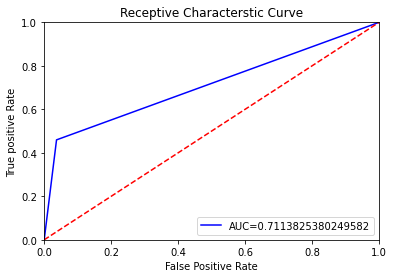

None


In [69]:
print(confusionMatrix(df))

## ROC Curve for Random forest

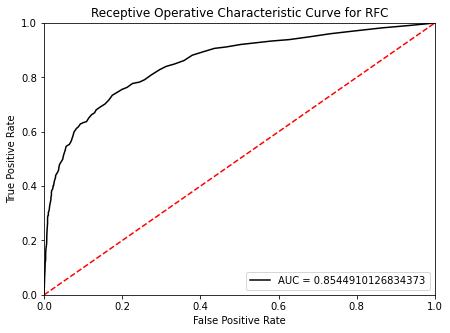

In [70]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
area_under_curve = auc(fpr, tpr)

plt.figure(figsize = (7,5))
plt.title('Receptive Operative Characteristic Curve for RFC')
plt.plot(fpr,tpr,'b',label = 'AUC = ' + str(area_under_curve), c = 'k')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r',linestyle='dashed')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [22]:
pwd

'C:\\Users\\Dell\\Untitled Folder 2\\ml_projects\\my_project'